In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ex2data1.txt', header=None, names=['sub1_score', 'sub2_score', 'result'])

In [3]:
df.head()

,sub1_score,sub2_score,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
X = df[['sub1_score', 'sub2_score']].values
y = df[['result']].values

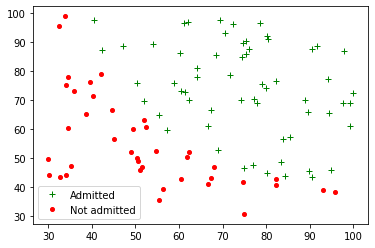

In [5]:
pos_label, neg_label = (y==1).reshape(1, -1)[0], (y==0).reshape(1, -1)[0]
# X[pos_label, :]
plt.plot(X[pos_label, :][:, 0], X[pos_label, :][:, 1], 'g+', label='Admitted')
plt.plot(X[neg_label, :][:, 0], X[neg_label, :][:, 1], 'ro', ms=4, label='Not admitted')
plt.legend()
plt.show()

### Sigmoid function
\begin{align}
g(z)=\frac{1}{1 + e^{-1}}
\end{align}

In [6]:
def sigmoid(z):
    "Take in z and return sigmoid function"
    return 1/(1 + np.exp(-z))

### Cost function

In [7]:
def compute_cost(X, y, theta):
    m = len(X)
#     err = (y * sigmoid(np.dot(X, theta)) - (1-y) * np.log(1 - sigmoid(np.dot(X, theta))))
#     return np.sum(-1/m  * err)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y *np.log(predictions)) - ((1-y) * np.log(1 - predictions))
    cost = 1/m * sum(error)
    return cost

In [8]:
def descent(X, y, theta):
    m = len(X)
    return 1/m * np.dot(X.T, sigmoid(np.dot(X, theta)) - y)

In [9]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [10]:
def gradient_descent(init_theta, X, y, learning_rate, iters):
    theta_history = [init_theta]
    J_history = [compute_cost(X, y, init_theta)]
    for i in range(iters):
        new_theta = theta_history[-1] - learning_rate * descent(X, y, theta_history[-1])
        theta_history.append(new_theta)
        J_history.append(compute_cost(X, y, theta_history[-1]))
    return theta_history[-1], J_history

In [11]:
X_normalized, X_mean, X_std = featureNormalization(X)
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X_normalized), axis=1)
init_theta = np.zeros((Xbar.shape[1], 1))
theta, J_history = gradient_descent(init_theta, Xbar, y, 1, 1500)
theta

array([[1.71835438],
       [3.99258451],
       [3.72493998]])

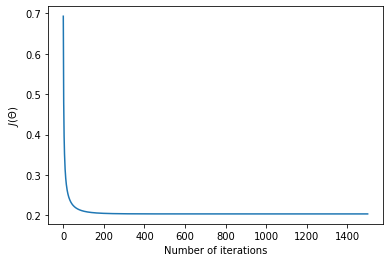

In [12]:
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('$J(\Theta)$')
plt.show()

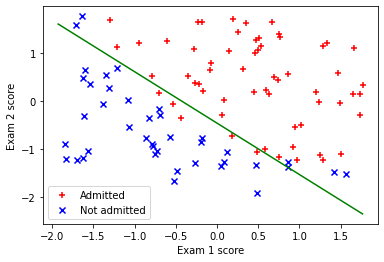

[[1.71835438]
 [3.99258451]
 [3.72493998]]


In [13]:
plt.scatter(X_normalized[pos_label,0],X_normalized[pos_label,1],c="r",marker="+",label="Admitted")
plt.scatter(X_normalized[neg_label,0],X_normalized[neg_label,1],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X_normalized[:,1]),np.max(X_normalized[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)
plt.show()
print(theta)